## HR Analytics Project- Understanding the Attrition in HR

#### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#let's start with loading dataset
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

There is total 1470 rows and 35 columns in dataset

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.nunique().sort_values(ascending=True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

We have 3 features which have unique values, we can delete them as they don't bring any significance for model.
We have one feature which has unique values for each record, We can delete this one also.

In [7]:
data.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

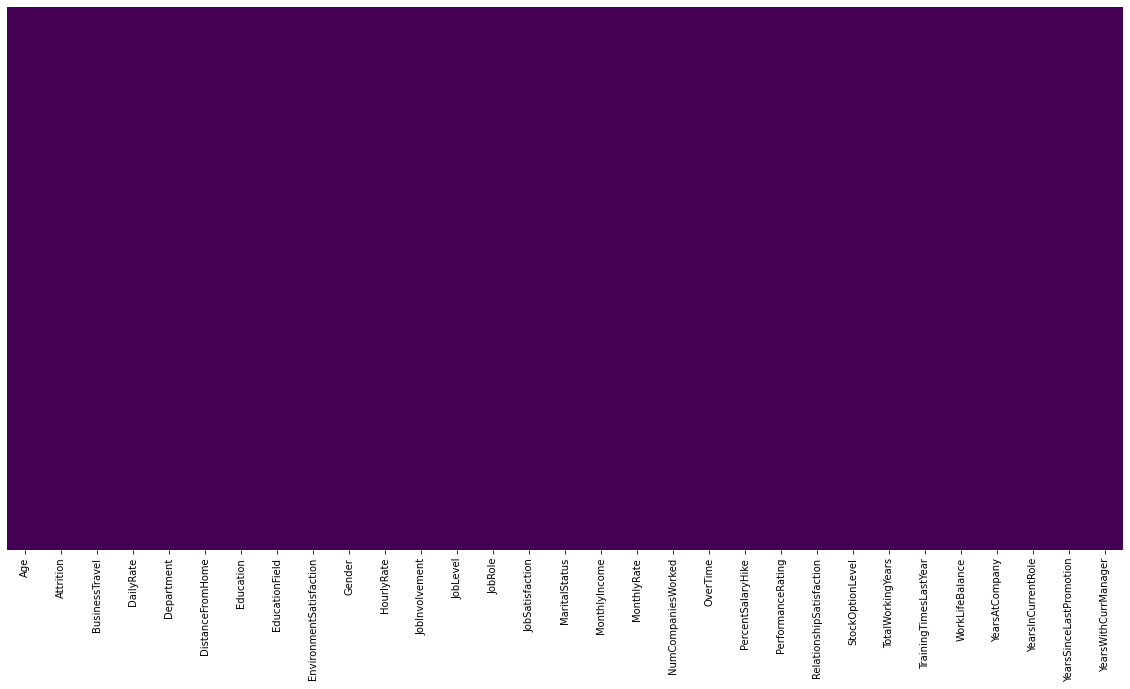

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

There are no null information in dataset.

In [9]:
# let's convert some categorical data into numerical data
data.Attrition.replace(['Yes','No'],[1,0],inplace=True)
data.Gender.replace(['Yes','No'],[1,0],inplace=True)
data.OverTime.replace(['Yes','No'],[1,0],inplace=True)

In [10]:
# Object datatypes
objdata=data.select_dtypes(include=['object'])

# numerical datatypes
numdata=data.select_dtypes(exclude=['object'])

In [11]:
objdata

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


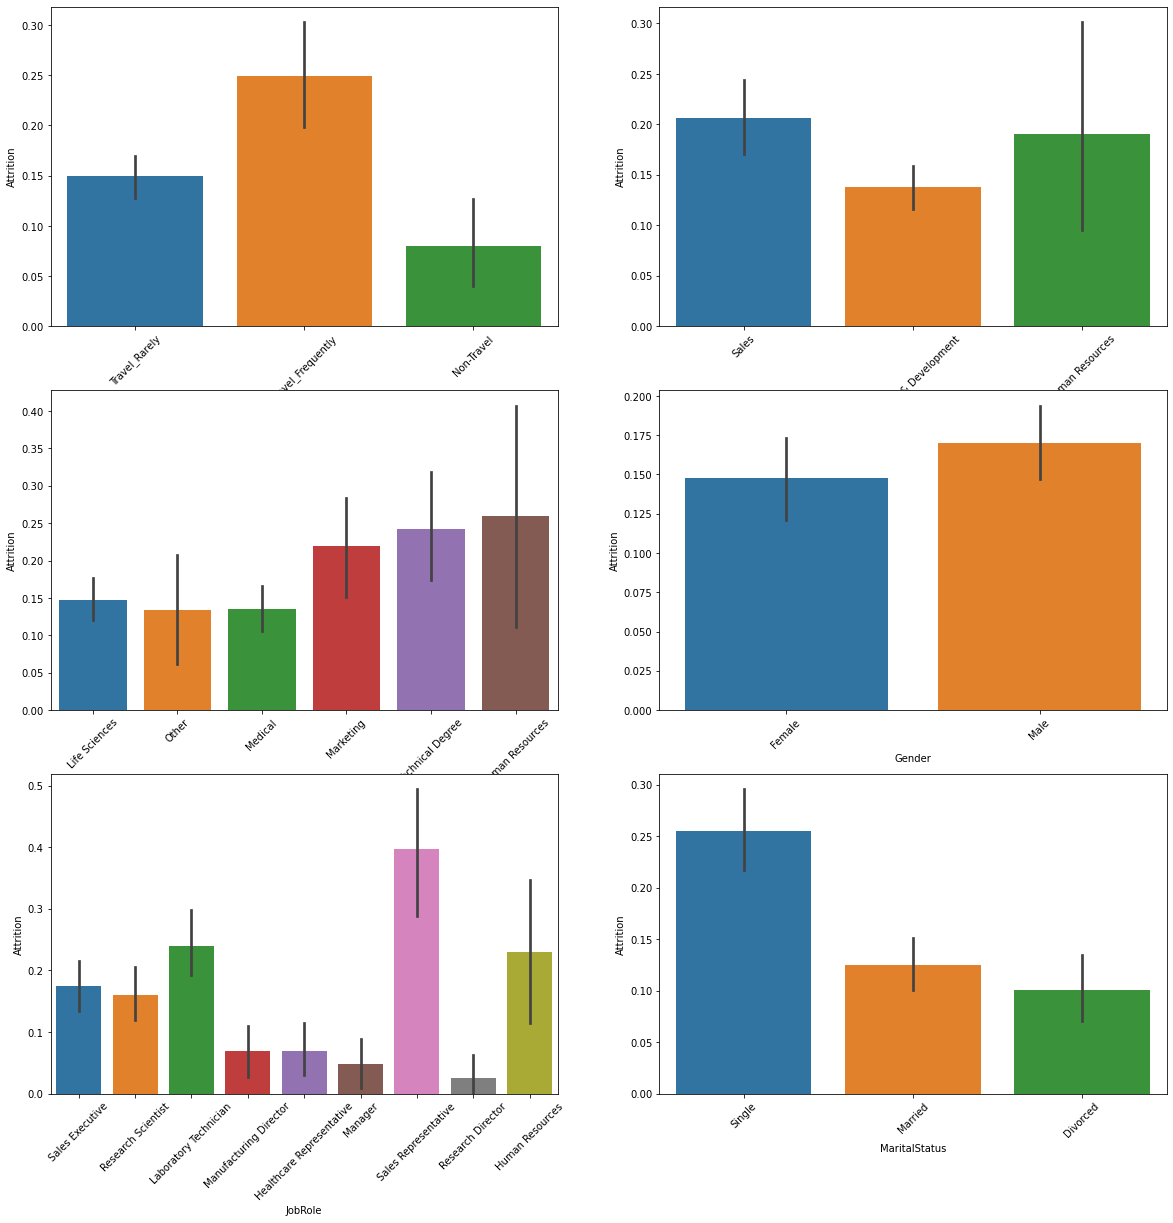

In [12]:
# relation of traget variable with categorical features
plt.figure(figsize=(20,20))
for i,feat in enumerate(objdata.columns):
    plt.subplot(3,2,i+1)
    sns.barplot(x=data[feat],y=data['Attrition'])
    plt.xticks(rotation=45)
plt.show()

Observation:

    1. Who travel frequently for business purpose tends to leave company early than who travel rarely and who don't need to travel will stay in company than others
    2. Research and development team employees will stay longer in company than other departments.
    3. Whose education background is from Human resources, Technical degrees, Marketing tends to leave companny than other ones from other Educational background.
    4. Sales representatives will leave company much earlier than others, Research Directors rarely leaves the company.
    5. Singles tends to leave company than married ones and divorced.

In [13]:
numdata.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


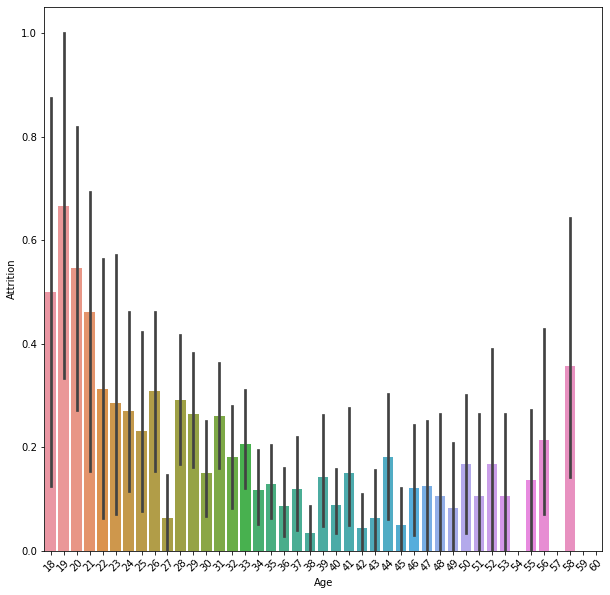

In [14]:
# visualizing Numeric features
# Age
plt.figure(figsize=(10,10))
sns.barplot(x=data['Age'],y=data['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation:
    
    1. Teenagers highly tends to leave company than Mid aged
    2. Persons whose age more than 55 tends to leave company than mid aged.

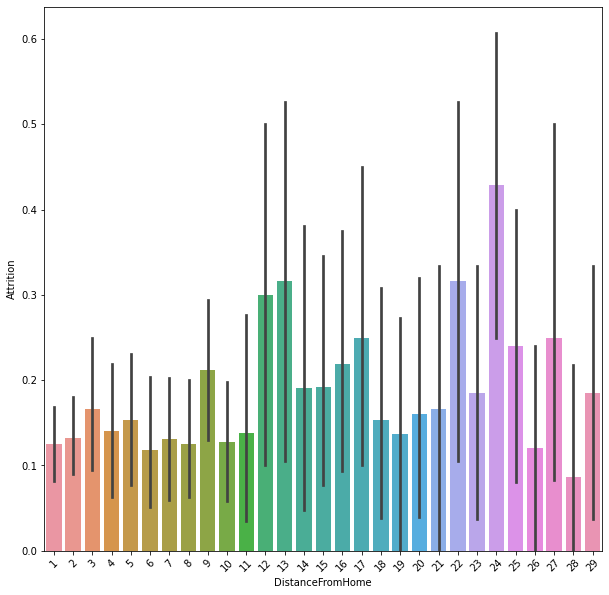

In [15]:
# Distance from home
plt.figure(figsize=(10,10))
sns.barplot(x=data['DistanceFromHome'],y=data['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation:
    
    Who travels from long distance to workplace tends leave company than others.

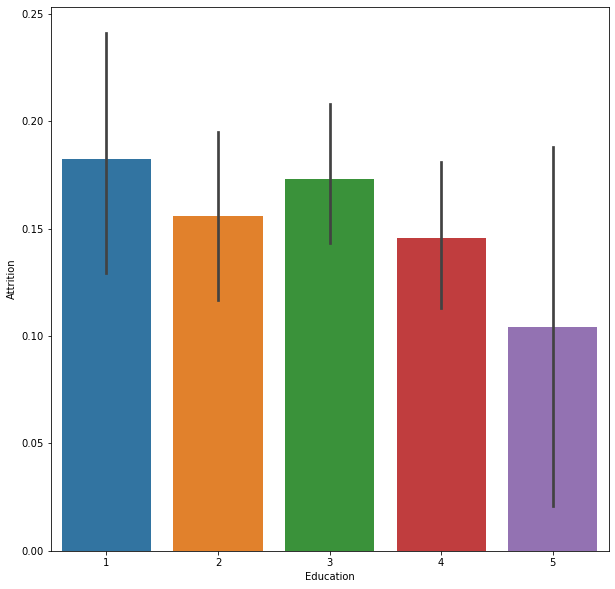

In [16]:
# Education
plt.figure(figsize=(10,10))
sns.barplot(x=data['Education'],y=data['Attrition'])
plt.show()

Observation:
    
    Who is less educated tends to leave company sooner than others.

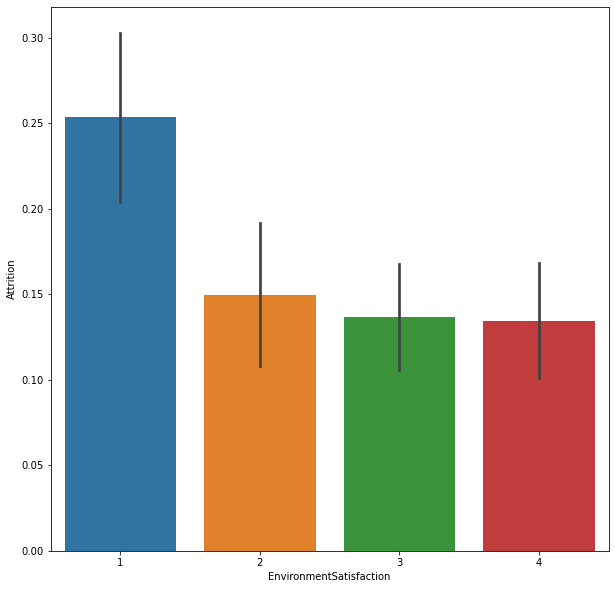

In [17]:
# Environment satisfaction
plt.figure(figsize=(10,10))
sns.barplot(x=data['EnvironmentSatisfaction'],y=data['Attrition'])
plt.show()

Observation:
    
    who leastly likes the environment in company tends to leave company sooner than others.

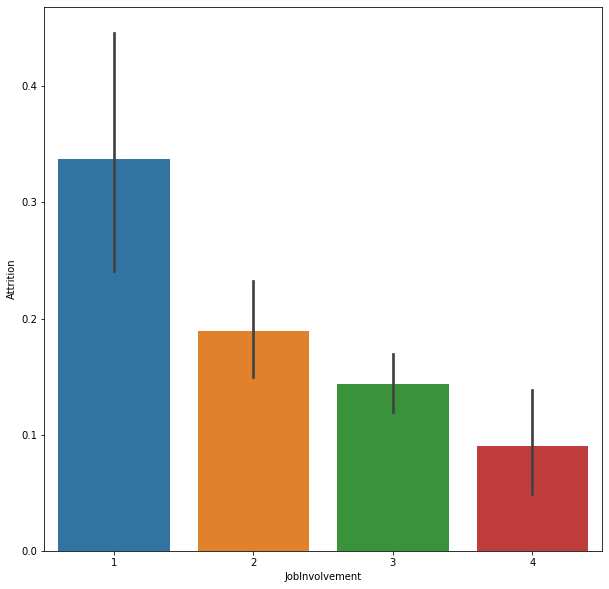

In [18]:
# Jobinvolvement
plt.figure(figsize=(10,10))
sns.barplot(x=data['JobInvolvement'],y=data['Attrition'])
plt.show()

Observation:
    
    Who leastly involves in Job in company tends to leave company sooner than others

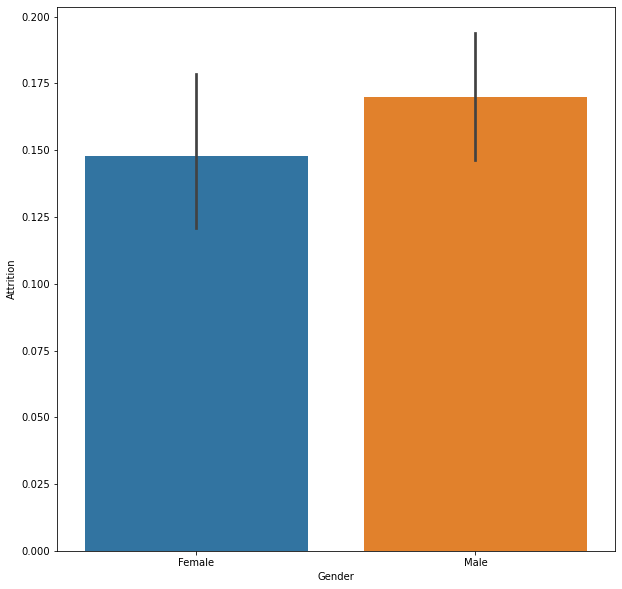

In [19]:
# Gender
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['Attrition'])
plt.show()

Observation:
    
    Female tends to leave company sooner than male

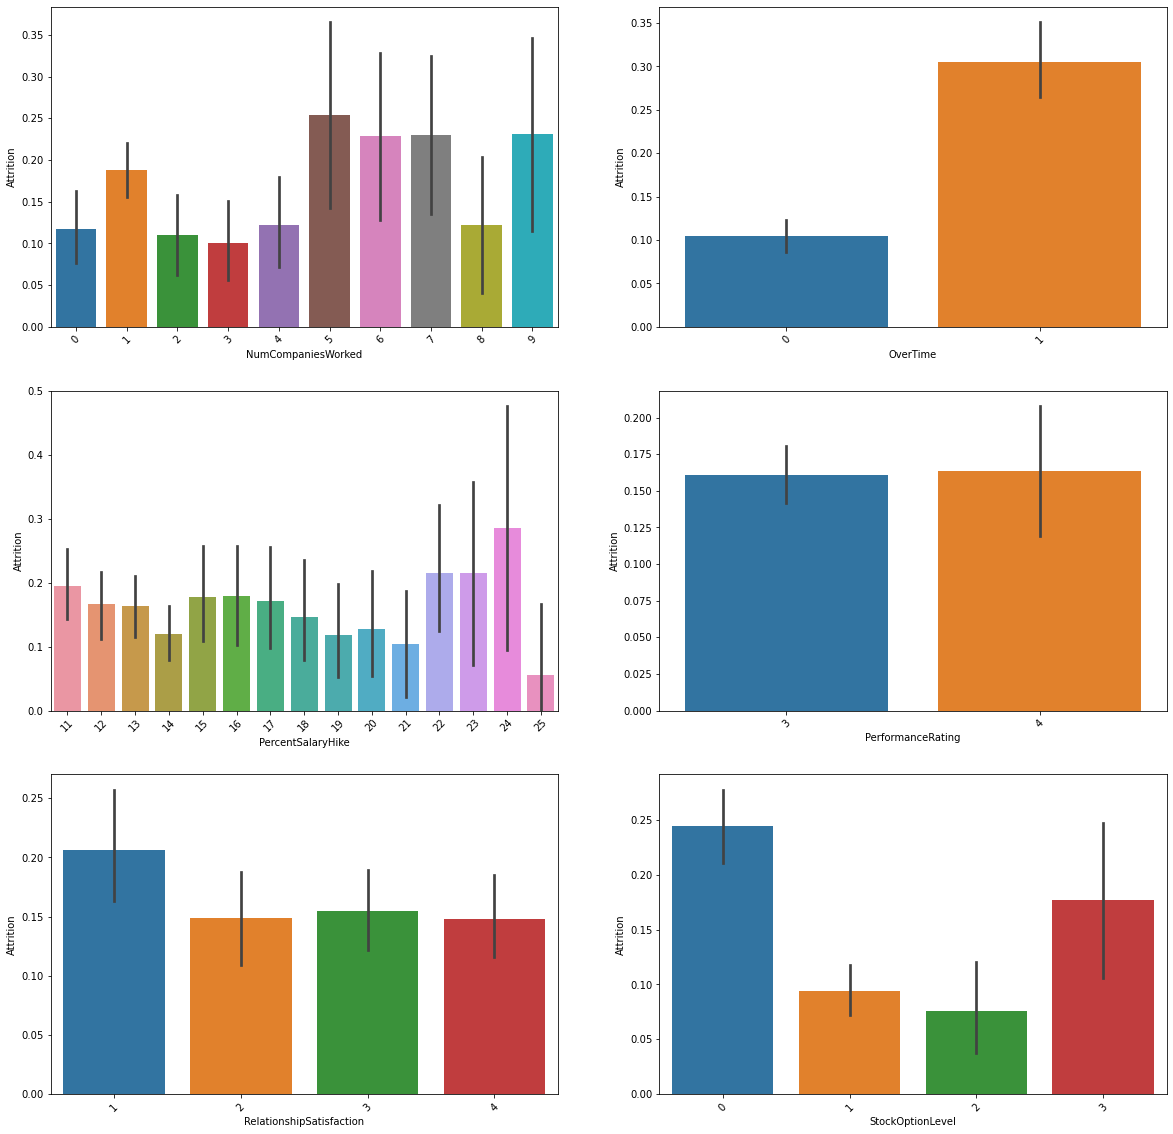

In [20]:
otherfea=['NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel']
plt.figure(figsize=(20,20))
for i, feat in enumerate(otherfea):
    plt.subplot(3,2,i+1)
    sns.barplot(x=data[feat],y=data['Attrition'])
    plt.xticks(rotation=45)
plt.show()

Observations:
    
    1. Who worked for more numbers of companies tends to switch again.
    2. Who works overtime tends to leave early.
    3. Who got more percentage of hike tends to leave company.
    4. Performance Rating 3 and 4 almost equal probability to leave or stay in company(We might need to remove          this feature, because it doesn't have much say in Modeling)
    5. who have less Relationship Satisfaction tends to leave earlier than other.
    6. who have no company stocks tends to leave than who have more options, who have more stock options tends          to leave than who have comparitively less options.

In [21]:
numdata.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

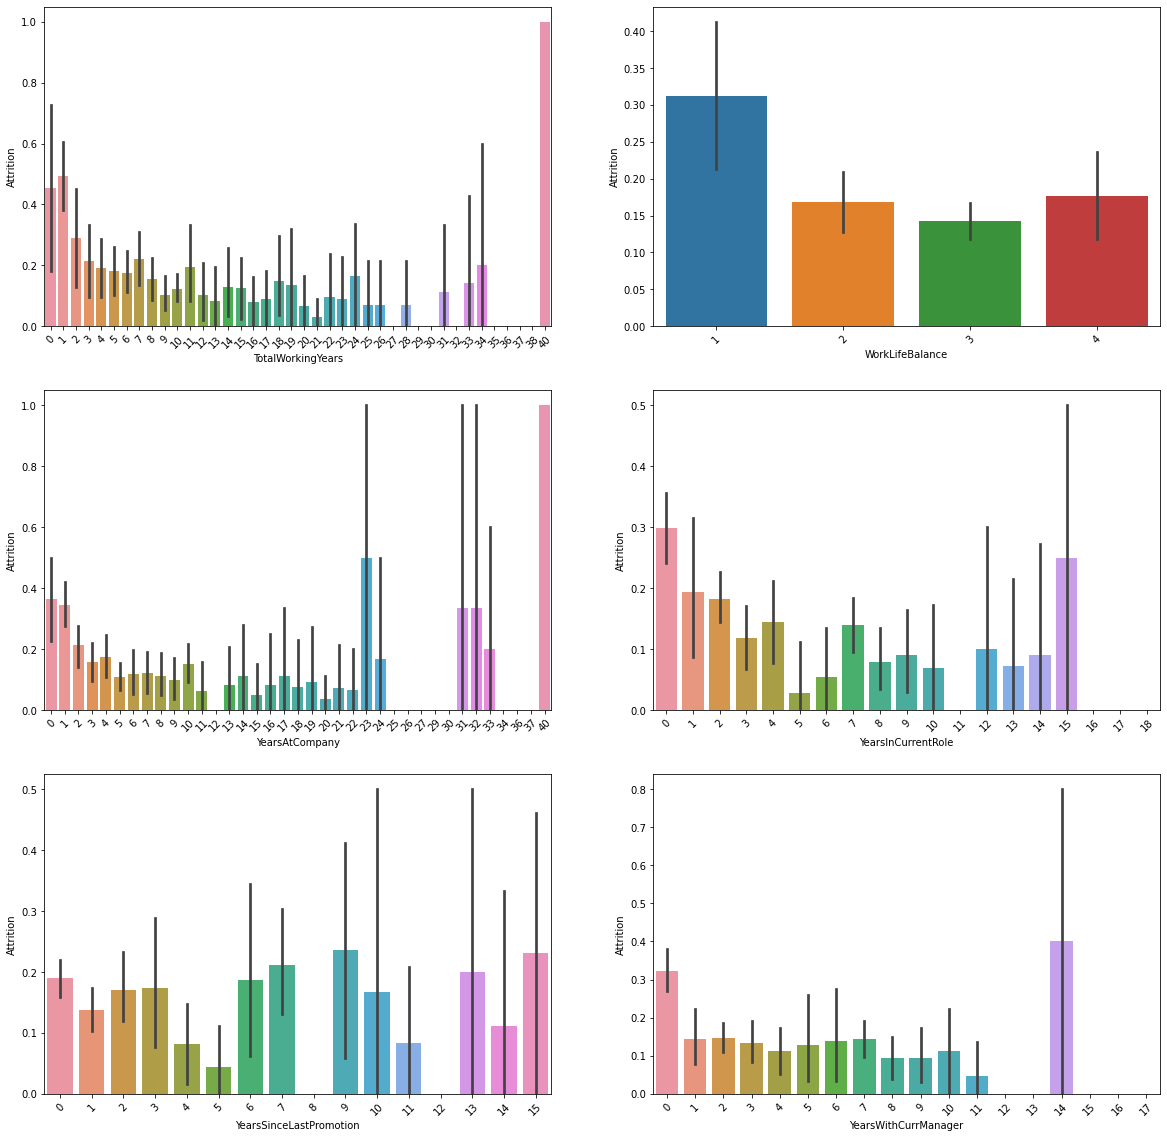

In [22]:
otherfea=['TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
plt.figure(figsize=(20,20))

for i,feat in enumerate(otherfea):
    plt.subplot(3,2,i+1)
    sns.barplot(x=data[feat],y=data['Attrition'])
    plt.xticks(rotation=45)
plt.show()

Observations:
    
    1. Employess who have 40 years experience will tend to leave company, Later who joined recently (Whose experience is below 2) tends to leave.
    2. Who have least worklife balance tends to resign faster than other
    3. Seniors in company tends to leave sooner than others
    4. Who stays in current role for longer time and who just got new role tends to leave company sooner than others.
    5. Who don't get promotion for long time tends to leave company
    6. Who stays with manager for longer time and shorter time tends to leave company than others.

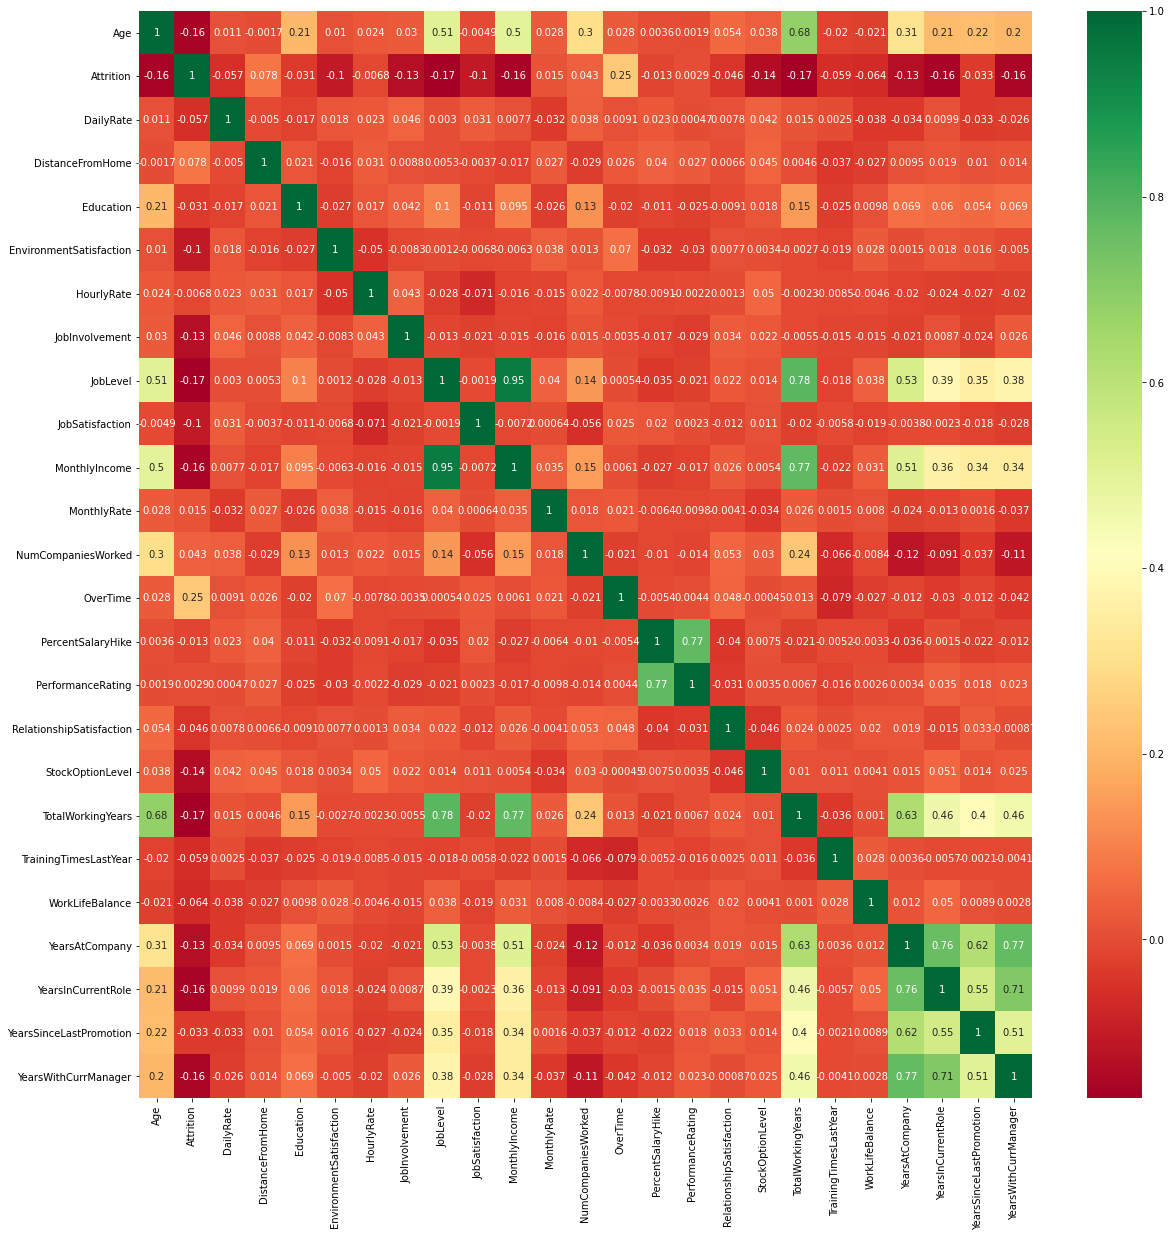

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn')
plt.show()

Observations:
    
    1. Joblevel is highly corelated with MonthlyIncome (95%)
    2. Joblevel is correlated with TotalExperience (78%)
    3. Percentage of SalaryHike is related to PerformanceRating(77%)
    4. MonthlyIncome is correlated with TotalExperience (77%)
    5. YearsAtCompany is correlated with YearsWithCurrentManager(77%)
    6. YearsAtCompany is correlated with YearCurrentRole (76%)
    7. Attrition rate is comparatevely highly correlated with overtime (25%)

In [24]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [25]:
# categorical variable conversion
data=pd.get_dummies(data,drop_first=True)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [27]:
# unique value features
uniVAlFea=[feat for feat in data.columns if data[feat].std()==0]
print(uniVAlFea)

# Quasi constants

from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.01)
sel.fit(data)

quasi_const_feat=data.columns.difference(data.columns[sel.get_support()])
print(quasi_const_feat)

[]
Index([], dtype='object')


Here we need to find whether Attrition happens or not based on given features, So we have to build Classfication model.

### Model Building

In [29]:
### We will create a copy of our main DF, just in case
df_model = data.copy()

#### Generation of Dummies variable

In [32]:
df_model = pd.get_dummies(df_model, drop_first=True)

In [33]:
# A quick look to our new variables
df_model.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 

In [34]:
# We create the array of target, and our dataset of features
X_model= df_model.drop(['Attrition'], axis=1)
y_model= df_model.Attrition

In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.30, random_state=42, stratify=y_model)

In [37]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [39]:
# we create a function to evaluate our model
def model_performance(model, name, X, y, cv):
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print("Performance of {}:\t{:0.3} ± {:0.3}".format( \
        name, s.mean().round(3), s.std().round(3)))

In [40]:
#Importing the base model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

model_performance(dt,"Tree base", X_train, y_train, cv)

Performance of Tree base:	0.806 ± 0.023


In [41]:
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=1)
model_performance(ab, "AdaBoostClassifier",  X_train, y_train, cv)

Performance of AdaBoostClassifier:	0.808 ± 0.026


In [42]:
gb = GradientBoostingClassifier()
model_performance(gb, "GradientBoostingClassifier", X_train, y_train, cv)

Performance of GradientBoostingClassifier:	0.878 ± 0.014


In [43]:
from sklearn.model_selection import GridSearchCV

params_ab = {"n_estimators": [500,1000],
          "learning_rate":[0.01, 0.1],
        "base_estimator__max_depth": [1, 2, 3]}

grid_ab = GridSearchCV(AdaBoostClassifier(base_estimator=dt,random_state=1), 
                       param_grid=params_ab, cv=cv, verbose=1, n_jobs=3)

In [44]:
grid_ab.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   28.2s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   45.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                          random_state=1),
             n_jobs=3,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [45]:
model_performance(grid_ab.best_estimator_,  "AdaBoostClassifier + GS", X_train, y_train, cv)

Performance of AdaBoostClassifier + GS:	0.89 ± 0.009


Our Best model is AdaBoostClassifier.

#### Model saving

In [46]:
import joblib
joblib.dump(grid_ab,'HR.pkl')

['HR.pkl']

In [47]:
# loading the saved model
model=joblib.load('HR.pkl')

In [48]:
prediction=model.predict(X_test)

In [49]:
prediction=pd.DataFrame(prediction) # converting into dataframe

In [50]:
prediction.to_csv('Results.csv',index=False)